# Quick description:

In this project I used data collected from 80 out of 120 students from L3 cohort(Senior Bachelor Degree students) to choose top 5 students from all faculties, which can be the Student Council in the following year.<br>
After collecting data, I used GoogleMatrix/Pagerank alghorithm to find, which students can be choosen as the represenatatives in PageRank terms, and students, that will be choosen, according to traditional majoritarian electoral system(Counting the number of votes for each candidate)

# Importing libraries and data

Here, I just imported some useful libraries for data manipulation(**Pandas**), matrix operation(**Numpy**), graph visualization(**Networkx**) and plottinf(**Seaborn, Matplotlib**):

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

Importing data from .xlsx file, which I get from Google Form:

In [2]:
file_name = "Elections.xlsx"
dfs = pd.read_excel(file_name, sheet_name="Лист5", index_col = 'Voter')
print(dfs.iloc[53])
dfs.head()

Candidate 1           Isa Baghirov
Candidate 2    Shoykyat Sharafyabi
Candidate 3        Narmin Ganbarli
Candidate 4     Mahammad Samadzade
Candidate 5         Macid Gurbanli
Unnamed: 6                     NaN
Unnamed: 7                     NaN
Unnamed: 8                     NaN
Unnamed: 9                     NaN
Unnamed: 10                    NaN
Name: Almaz Omarov, dtype: object


,Candidate 1,Candidate 2,Candidate 3,Candidate 4,Candidate 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
Voter,,,,,,,,,,
Isa Baghirov,Isa Baghirov,Kanan Habibli,Kamal Taghiyev,Narmin Ganbarli,Mahammad Guliyev,NaN,NaN,NaN,NaN,NaN
Kanan Mikayilov,Samir Aghayev,Anar Mammadov,Turqay Gardashli,Aysu Majidli,Narmin Ganbarli,NaN,NaN,NaN,NaN,NaN
Rashad Aliyev,Javad Alizada,İbrahimali Mammadov,Mirzemehdi Karimov,Niyazi Gadiri,Kanan Habibli,NaN,NaN,NaN,NaN,NaN
Shirin Shukurov,Rufat Huseynov,Almaz Omarov,Reshad,Rashad Aliyev,Teymur Kosayev,NaN,NaN,NaN,NaN,NaN
Javid Guliyev,Anday Ismayilzade,Sadiq Gojayev,Mecid,Ramin Afandiyev,Elvin Salmanov,NaN,NaN,NaN,NaN,NaN


# Data cleansing plan:

As you can see above, there are some mistakes in the number of columns, and some entries have space characters at the beginning of strings or the end, in the candidate X field, or Voter index. Moreover, some fields are invalid(only first name was entered or grammatic mistakes in the first name) <br> <br>
My plan is replacing name with mistakes with the names from Voter Index(the name which every Voter defined himself), and drop the invalid fullnames(only first or second name). Also I will drop useless columns(Unnamed columns).

In [3]:
cols_drop = ['Unnamed: ' + str(x) for x in range(6, 11)]
dfs = dfs.drop(cols_drop, axis = 1)
dfs = dfs.apply(lambda x: x.str.strip())
dfs = dfs.rename(index = lambda x: x.strip())
dfs.to_csv('out.csv')
dfs.head()

,Candidate 1,Candidate 2,Candidate 3,Candidate 4,Candidate 5
Voter,,,,,
Isa Baghirov,Isa Baghirov,Kanan Habibli,Kamal Taghiyev,Narmin Ganbarli,Mahammad Guliyev
Kanan Mikayilov,Samir Aghayev,Anar Mammadov,Turqay Gardashli,Aysu Majidli,Narmin Ganbarli
Rashad Aliyev,Javad Alizada,İbrahimali Mammadov,Mirzemehdi Karimov,Niyazi Gadiri,Kanan Habibli
Shirin Shukurov,Rufat Huseynov,Almaz Omarov,Reshad,Rashad Aliyev,Teymur Kosayev
Javid Guliyev,Anday Ismayilzade,Sadiq Gojayev,Mecid,Ramin Afandiyev,Elvin Salmanov


Below I choose every voters name and print it for creating a replacing dictrionary.<br>
Replacing dictionary is a structure, which will replace invalid data.

In [4]:
names_voters = set(dfs.index)
names_voters = list(names_voters)
names_voters.sort()
print("The number of Voters in sorted list: ", len(names_voters))
print("The number of Voter in Dataframe:    ", len(dfs.index))
print("Names of voters, which they entered themselves:\n", '\n'.join(names_voters))


The number of Voters in sorted list:  75
The number of Voter in Dataframe:     75
Names of voters, which they entered themselves:
 Adila Atakishiyeva
Ali Aliyev
Aliaga Shukurlu
Almaz Omarov
Amina Hajiyeva
Anday Ismayilzade
Atifa Aghazade
Aydan Imamguliyeva
Aydin Firdouzov
Ayhan Ibrahimov
Aykhan Chelebi
Aysu Majidli
Elmira Jabbarova
Elvin Aghalarov
Elvin Salmanov
Farhad Momeni Rahkolai
Farid Shibliyev
Fuad Rahimli
Hacibala Suleymanli
Hemze Ismayilov
Ibrahimali Mammadov
Isa Baghirov
Jamil Allahverdiyev
Jamila Aliyeva
Javad Alizada
Javid Guliyev
Jeyhun Abbasov
Kamal Bayramov
Kamal Taghiyev
Kanan Habibli
Kanan Mikayilov
Madat Sardarli
Mahammad Samadzade
Mahammad Shikhiyev
Majid Gurbanli
Malik Abdullayev
Mehrab Najafli
Mehrali Niftaliyev
Mirzemehdi Karimov
Murad Farajullayev
Murad Gahramanov
Nadir Abdullayev
Nafila Amirli
Narmin Ganbarli
Natavan Mammadova
Nigar Yusifzade
Nihat Novruzov
Nijat Zakiyev
Nofel Agayarli
Nuray Damirchiyeva
Nurlan Talibov
Ofelya Rahmanova
Rahim Namazli
Ramazan Safa

Here I use some Set Theory for choosing candidates, which is not in Voters list:<br>
A - set of Voters <br>
B - set of Candidates(5 for each entry) <br>
C - set of Candidates, who did not vote or the name was invalid for each entry 
C = C + (B \ A) (set difference)

In [5]:
names_voters = set(dfs.index)
not_voted = list()
for i in dfs.columns:
    cand = dfs.loc[:, i].array.unique().to_numpy()
    cand = set(cand)
    not_voted.append(cand.difference(names_voters))
not_voted_set = set(not_voted[0].union(not_voted[1], not_voted[2], not_voted[3], not_voted[4]))
not_voted_list = list(not_voted_set)
not_voted_list.sort()
print("Number of non-voters, but who was voted by someone and invalid entries:", len(not_voted_list))
print("Students, who did not voted, but someone voted for them:\n", '\n'.join(not_voted_list))


Number of non-voters, but who was voted by someone and invalid entries: 52
Students, who did not voted, but someone voted for them:
 Alvin Agalarov
Anar Mammadov
Asad Dashdamirli
Atifa Aghazada
Aykhan Ibrahimov
Azer Gasimov
Ceyhun
Eliaga
Fahmin Guliyev
Farhad Momeni Rakholai
Farid Khudiyev
Ferhad
Ferhad Momeni
Ferid
Ferxan Momeni Rakkolai
Fidan Jafarova
Fidan Karimova
Gulzar Safarli
Gunel Safaraliyeva
Hachibala Suleymanli
Hasanaga Abbaszade
Ilkin Mammadov
Jamil Allahverdiev
Javidan Mammadli
Javidan Rasulzade
Jeyhun  Abbasov
Kanan Abdurahimov
Kanan Suleymanli
Macid Gurbanli
Mahammad Guliyev
Maharram Guliyev
Mecid
Medet
Narmin Karimova
Nazir Ahmadli
Nigar Aghayeva
Nigar Allahverdiyeva
Nihad Novruzov
Nijat Azimzade
Niyazi Gadiri
Ramin Afandiyev
Reshad
Rufat Huseynov
Sadiq Gojayev
Said Guliev
Saidanur Sideif-zada
Salim Kazim-zade
Sayad Baghirli
Server Mammadov
Sona Rustamova
Turqay Umudzade
İbrahimali Mammadov


Below I created replace dictionary, which will replace mistakes and invalid data to None and standardized labels in Original Dataframe.

In [6]:
replace_dict = {'Alvin Agalarov': "Elvin Aghalarov",
 'Anar Mammadov':"Anar Mammadov",
 'Asad Dashdamirli': "Asad Dashdamirli",
 'Atifa Aghazada': "Atifa Aghazade",
 'Aydan Imamguliyeva' : "Aydan Imamguliyeva",
 'Aykhan Ibrahimov' : "Ayhan Ibrahimov",
 'Azer Gasimov' : "Azer Gasimov",
 'Ceyhun' : None,
 'Eliaga': None,
 'Fahmin Guliyev': "Fahmin Guliyev",
 'Farhad Momeni Rakholai' : "Farhad Momeni Rahkolai",
 'Farid Khudiyev' : "Farid Khudiyev" ,
 'Ferhad': None,
 'Ferhad Momeni' : "Farhad Momeni Rahkolai",
 'Ferid' : None,
 'Ferxan Momeni Rakkolai' : "Farhad Momeni Rahkolai",
 'Fidan Jafarova' : "Fidan Jafarova",
 'Fidan Karimova' : "Fidan Karimova",
 'Gulzar Safarli' : "Gulzar Safarli",
 'Gunel Safaraliyeva' : "Gunel Safarliyeva",
 'Hachibala Suleymanli' : "Hacibala Suleymanli",
 'Hasanaga Abbaszade' : "Hasanaga Abbaszade",
 'Ilkin Mammadov' : "Ilkin Mammadov",
 'Jamil Allahverdiev' : "Jamil Allahverdiyev",
 'Javidan Mammadli' : "Javidan Mammadli",
 'Javidan Rasulzade' : "Javidan Rasulzade",
 'Jeyhun  Abbasov' : "Jeyhun Abbasov",
 'Kanan Abdurahimov' : "Kanan Abdurahimov",
 'Kanan Suleymanli' : "Kanan Suleymanli",
 'Macid Gurbanli' : "Majid Gurbanli",
 'Mahammad Guliyev' : "Mahammad Guliyev",
 'Maharram Guliyev' : "Maharram Guliyev",
 'Mecid' : None,
 'Medet' : None,
 'Narmin Karimova': "Narmin Karimova",
 'Nazir Ahmadli' : "Nazir Ahmadli",
 'Nigar Aghayeva': "Nigar Aghayeva",
 'Nigar Allahverdiyeva' : "Nigar Allahverdiyeva",
 'Nihad Novruzov' : "Nihat Novruzov",
 'Nijat Azimzade' : "Nijat Azimzade",
 'Niyazi Gadiri' : "Niyazi Gadiri",
 'Ramin Afandiyev': "Ramin Afandiyev",
 'Reshad' : None,
 'Rufat Huseynov' : "Rufat Huseynov",
 'Sadiq Gojayev' : "Sadiq Qojayev",
 'Said Guliev' : "Said Guliyev",
 'Saidanur Sideif-zada' : 'Saidanur Sideif-zada',
 'Salim Kazim-zade' : "Salim Kazim-zade",
 'Sayad Baghirli' : "Sayad Baghirli",
 'Server Mammadov': "Sarvar Mammadov",
 'Shabnam Rajili' : "Shabnam Rajili",
 'Sona Rustamova' : "Sona Rustamova",
 'Turqay Umudzade': "Turqay Umudzade",
 'İbrahimali Mammadov': "Ibrahimali Mammadov"}
dict_keys = replace_dict.keys()

for i in dfs.columns:
    for j in dfs.index:
        if(dfs.loc[j, i] in dict_keys):
            dfs.loc[j, i] = replace_dict[dfs.loc[j,i]]


What to do with students, who did not voted, but was voted?<br> <br>
I add them as a reference with low quality(the reference, which does not show to anyone).

In [7]:
names_voters = set(dfs.index)
not_voted = list()
for i in dfs.columns:
    cand = dfs.loc[:, i].array.unique().to_numpy()
    cand = set(cand)
    not_voted.append(cand.difference(names_voters))
not_voted_set = set(not_voted[0].union(not_voted[1], not_voted[2], not_voted[3], not_voted[4]))
not_voted_list = list(not_voted_set)
not_voted_list = sorted(not_voted_list, key=lambda x: (x is None, x))
not_voted_list = not_voted_list[:-1] ## The last element is None, so I dropped it
print("Number of non-voters, but who was voted by someone:", len(not_voted_list))
print("Students, who did not voted, but someone voted for them:\n", '\n'.join(not_voted_list))

Number of non-voters, but who was voted by someone: 30
Students, who did not voted, but someone voted for them:
 Anar Mammadov
Asad Dashdamirli
Azer Gasimov
Fahmin Guliyev
Farid Khudiyev
Fidan Jafarova
Fidan Karimova
Gulzar Safarli
Gunel Safarliyeva
Hasanaga Abbaszade
Ilkin Mammadov
Javidan Mammadli
Javidan Rasulzade
Kanan Abdurahimov
Kanan Suleymanli
Mahammad Guliyev
Maharram Guliyev
Narmin Karimova
Nazir Ahmadli
Nigar Aghayeva
Nigar Allahverdiyeva
Nijat Azimzade
Niyazi Gadiri
Ramin Afandiyev
Rufat Huseynov
Saidanur Sideif-zada
Salim Kazim-zade
Sayad Baghirli
Sona Rustamova
Turqay Umudzade


In [8]:
columns = list(dfs.columns)
data = pd.DataFrame(index = not_voted_list, columns = dfs.columns)
data.index.name = 'Voter'
for i in data.index:
    data.loc[i,:] = None

dfs = dfs.append(data)
dfs.tail()

,Candidate 1,Candidate 2,Candidate 3,Candidate 4,Candidate 5
Voter,,,,,
Saidanur Sideif-zada,None,None,None,None,None
Salim Kazim-zade,None,None,None,None,None
Sayad Baghirli,None,None,None,None,None
Sona Rustamova,None,None,None,None,None
Turqay Umudzade,None,None,None,None,None


# Google Matrix construction

Dictionary for not to loose labels in adjacency matrix

In [9]:
all_voters = dict()
for i, j in enumerate(dfs.to_numpy()):
    all_voters[dfs.index[i]] = j
all_voters

{'Isa Baghirov': array(['Isa Baghirov', 'Kanan Habibli', 'Kamal Taghiyev',
        'Narmin Ganbarli', 'Mahammad Guliyev'], dtype=object),
 'Kanan Mikayilov': array(['Samir Aghayev', 'Anar Mammadov', 'Turqay Gardashli',
        'Aysu Majidli', 'Narmin Ganbarli'], dtype=object),
 'Rashad Aliyev': array(['Javad Alizada', 'Ibrahimali Mammadov', 'Mirzemehdi Karimov',
        'Niyazi Gadiri', 'Kanan Habibli'], dtype=object),
 'Shirin Shukurov': array(['Rufat Huseynov', 'Almaz Omarov', None, 'Rashad Aliyev',
        'Teymur Kosayev'], dtype=object),
 'Javid Guliyev': array(['Anday Ismayilzade', 'Sadiq Qojayev', None, 'Ramin Afandiyev',
        'Elvin Salmanov'], dtype=object),
 'Javad Alizada': array(['Niyazi Gadiri', 'Turqay Gardashli', 'Kanan Mikayilov',
        'Gunel Safarliyeva', 'Zarifa Huseynova'], dtype=object),
 'Seyid Alibeyli': array(['Farid Khudiyev', 'Nazir Ahmadli', 'Anar Mammadov',
        'Ofelya Rahmanova', 'Nigar Yusifzade'], dtype=object),
 'Rasim Mammadov': array(['Farid S

H_mat was constructed by choosing the importance of each person(0.2 if he voted for all 5 candidates or 0 if he did not vote for anyone). You can see that row for Isa Bagirov(0 index) get importance from himself(0 index), Aydan Imamguliyeva(12 index), Samir Aghayev(30 index) etc.

In [10]:
H_mat = np.zeros(shape = (len(all_voters), len(all_voters)))
all_list = list(all_voters.keys())
counter = 0
for i in all_voters:
    for cand in all_voters[i]:
        if cand is None:
            continue
        if cand in all_list:
            H_mat[all_list.index(cand),counter] = 0.2 #Each vote(1) should be divided by number of candidates(5)
        
    counter += 1
print(H_mat[0]) # For checking right filling of the number (Row - Isa Bagirov)
print(counter)

[0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.2 0.  0.  0.2 0.  0.  0.  0.  0.  0.2 0.  0.  0.2
 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
105


The Google Matrix is constructed from equaion below: $$G_{i, j} = \alpha * S_{i, j} + (1 - \alpha) * \frac{1}{N}$$

Where $\alpha$ means dampling factor(the probability that user will stop clicking in some reference (c) Sergey Brin). 

[[0.17142857 0.00142857 0.00142857 ... 0.00142857 0.00142857 0.00142857]
 [0.00142857 0.00142857 0.00142857 ... 0.00142857 0.00142857 0.00142857]
 [0.00142857 0.00142857 0.00142857 ... 0.00142857 0.00142857 0.00142857]
 ...
 [0.00142857 0.00142857 0.00142857 ... 0.00142857 0.00142857 0.00142857]
 [0.00142857 0.00142857 0.00142857 ... 0.00142857 0.00142857 0.00142857]
 [0.00142857 0.00142857 0.00142857 ... 0.00142857 0.00142857 0.00142857]]


<AxesSubplot:>

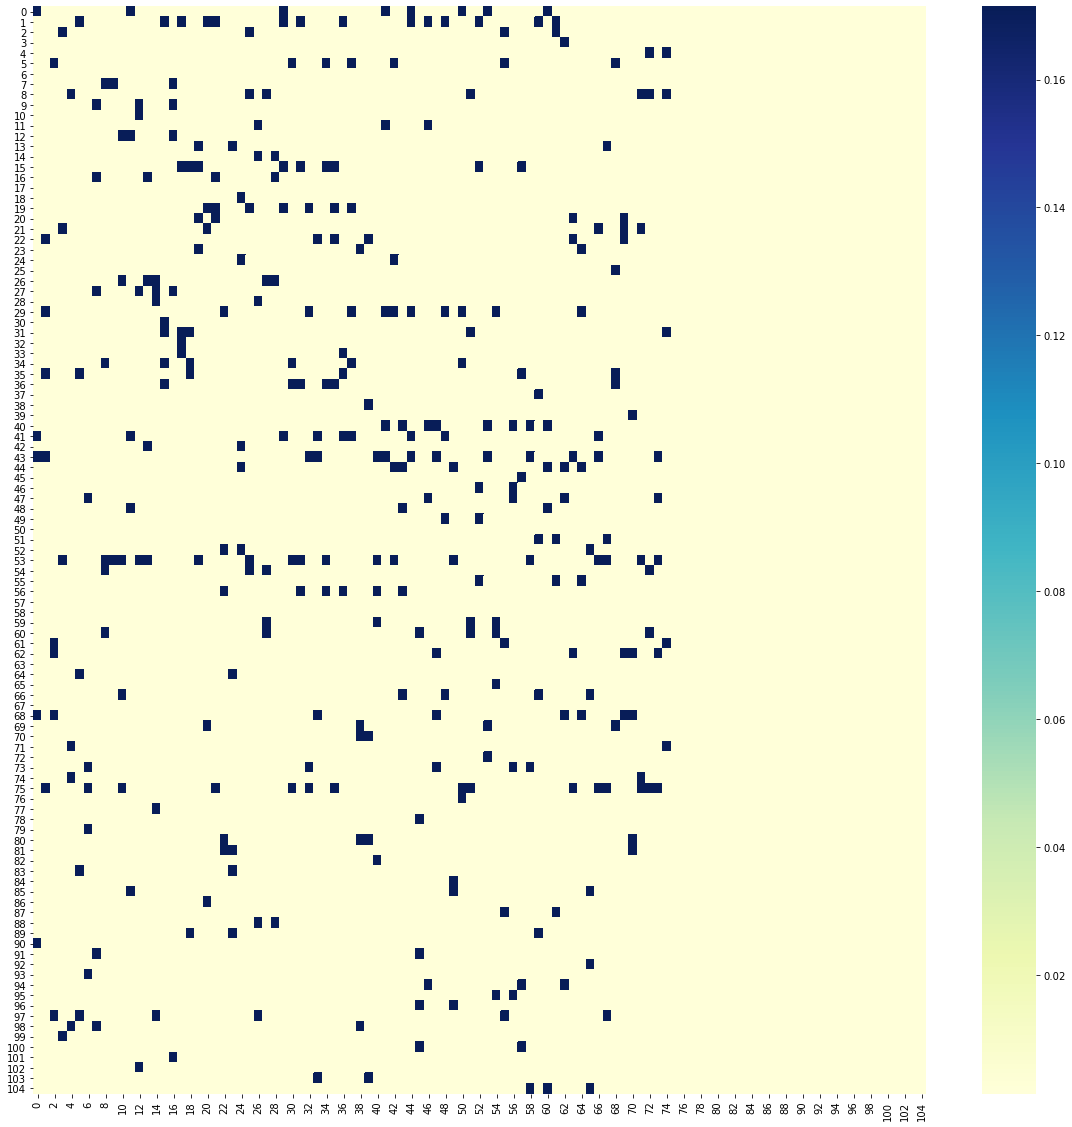

In [11]:
damping_factor = 0.85 

Google_Matrix = H_mat * damping_factor + (1 - damping_factor) * (1/len(all_list)) * np.ones((len(all_list), len(all_list)))
np.place(Google_Matrix, Google_Matrix == 0, (1-damping_factor) * 1/(len(all_list)))
print(Google_Matrix)
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(Google_Matrix, cmap="YlGnBu")


# PageRank calculation

The PageRank is calculated using power iteration until the convergence point of eigenvectors of Google matrix. Actually, we choose the number of iteration manually, but we can easily assume that after 80 it will converged, because of the small number of dimensions in matrix.<br>
Recursive formula for eigenvector approximation:
$$\lambda_{k+1} = {{A*\lambda_{k}}\over{||A*\lambda_{k}||}}$$

In [12]:
def power_iteration(A, num_iters):
    rank = np.full((1, len(all_list)), 1/len(all_list))
    rank = rank.ravel()
    for i in range(num_iters):
        rank = np.dot(A, rank)/np.linalg.norm(np.dot(A, rank))   
    return rank

Here was created rank array of each voter. And i added dictionary for label decoding from adjacency matrix.

In [13]:
rank = list(power_iteration(H_mat, 100).ravel())
rank_dict_idx = dict()
for i, j in enumerate(all_voters.keys()):
    rank_dict_idx[i] = j
rank_dict_idx

{0: 'Isa Baghirov',
 1: 'Kanan Mikayilov',
 2: 'Rashad Aliyev',
 3: 'Shirin Shukurov',
 4: 'Javid Guliyev',
 5: 'Javad Alizada',
 6: 'Seyid Alibeyli',
 7: 'Rasim Mammadov',
 8: 'Anday Ismayilzade',
 9: 'Ulvi Aghayev',
 10: 'Mehrali Niftaliyev',
 11: 'Aydan Imamguliyeva',
 12: 'Aliaga Shukurlu',
 13: 'Madat Sardarli',
 14: 'Nofel Agayarli',
 15: 'Sarvar Mammadov',
 16: 'Farid Shibliyev',
 17: 'Malik Abdullayev',
 18: 'Mahammad Shikhiyev',
 19: 'Elvin Aghalarov',
 20: 'Rashad Mammadzade',
 21: 'Teymur Kosayev',
 22: 'Aysu Majidli',
 23: 'Shabnam Rajili',
 24: 'Murad Farajullayev',
 25: 'Ali Aliyev',
 26: 'Farhad Momeni Rahkolai',
 27: 'Fuad Rahimli',
 28: 'Ramazan Safarov',
 29: 'Samir Aghayev',
 30: 'Aydin Firdouzov',
 31: 'Kamal Bayramov',
 32: 'Hemze Ismayilov',
 33: 'Murad Gahramanov',
 34: 'Nurlan Talibov',
 35: 'Turqay Gardashli',
 36: 'Vusal Azimov',
 37: 'Zaur Aghayev',
 38: 'Nafila Amirli',
 39: 'Amina Hajiyeva',
 40: 'Shoykyat Sharafyabi',
 41: 'Kamal Taghiyev',
 42: 'Tahir Abd

# Final elections

Below I show results of 2 types of election: PageRank and Majoriatrian.  

In [14]:
rank_dict = dict()
for i, j in enumerate(all_voters.keys()):
    rank_dict[j] = rank[i]
rank_dict = dict(sorted(rank_dict.items(), key=lambda item: item[1], reverse = True))
rank_list = list(rank_dict.items())
print("The people, who are elected using PageRank algorithm:")
counter = 0
for i in rank_list[:10]:
    counter += 1
    print("The", counter, "place:", i[0], "with rank", round(i[1],5))
    if(counter == 5):
        print('--------------------------------------------------------------------')

The people, who are elected using PageRank algorithm:
The 1 place: Narmin Ganbarli with rank 0.43006
The 2 place: Shoykyat Sharafyabi with rank 0.31572
The 3 place: Isa Baghirov with rank 0.29199
The 4 place: Kanan Mikayilov with rank 0.2745
The 5 place: Kamal Taghiyev with rank 0.27114
--------------------------------------------------------------------
The 6 place: Jeyhun Abbasov with rank 0.24742
The 7 place: Almaz Omarov with rank 0.23208
The 8 place: Samir Aghayev with rank 0.23161
The 9 place: Anar Mammadov with rank 0.19118
The 10 place: Sevinc Abbasova with rank 0.14959


In [15]:
major_dict = dict()
array_votes = dfs.to_numpy()
for i in dfs.index:
    count = 0
    for j in dfs.columns:
        x = dfs[j].value_counts()
        if(i in x.index):
            count+= x[i]
    major_dict[i] = count
major_dict = dict(sorted(major_dict.items(), key=lambda item: item[1], reverse = True))
major_list = list(major_dict.items())
print("The people, who are elected using Majoritar election algorithm:")
counter = 0
for i in major_list[:10]:
    counter += 1
    print("The", counter, "place:", i[0], "with number of votes", round(i[1],5))
    if(counter == 5):
        print('--------------------------------------------------------------------')

The people, who are elected using Majoritar election algorithm:
The 1 place: Almaz Omarov with number of votes 19
The 2 place: Anar Mammadov with number of votes 15
The 3 place: Kanan Mikayilov with number of votes 14
The 4 place: Narmin Ganbarli with number of votes 13
The 5 place: Samir Aghayev with number of votes 11
--------------------------------------------------------------------
The 6 place: Sarvar Mammadov with number of votes 9
The 7 place: Kamal Taghiyev with number of votes 9
The 8 place: Isa Baghirov with number of votes 8
The 9 place: Shoykyat Sharafyabi with number of votes 8
The 10 place: Kanan Habibli with number of votes 8


# Construction of graph using networkx

At first, I constructed adjacency matrix from adjacency list of voters

In [16]:
adj_mat = np.zeros(shape = (len(all_voters), len(all_voters)))
all_list = list(all_voters.keys())
counter = 0
for i in all_voters:
    for cand in all_voters[i]:
        if cand is None:
            continue
        if cand in all_list:
            adj_mat[counter, all_list.index(cand)] = 1 #Each vote(1) should be divided by number of candidates(5)
        
    counter += 1
print(adj_mat[0]) # For checking right filling of the number (Row - Isa Bagirov)
print(counter)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
105


In [17]:
df = pd.DataFrame(adj_mat)
graph = nx.from_pandas_adjacency(df, nx.DiGraph)

# Analysis of graph metrics

Afterwards, there was constructed Graph object from Pandas Dataframe and different graph metrics, such that **Degree centrality**, **Betweenness centrality**, **Katz centrality**, **Eigenvector centrality**, **Closeness centrality** were measured.

In [18]:
degree_centrality = nx.degree_centrality(graph)
betweenes_centrality = nx.betweenness_centrality(graph)
katz_cent = nx.katz_centrality_numpy(graph)
eig_cent = nx.eigenvector_centrality(graph)
closeness_cent = nx.closeness_centrality(graph)
nx.set_node_attributes(graph, degree_centrality, "degree")
nx.set_node_attributes(graph, betweenes_centrality, "between")
nx.set_node_attributes(graph, katz_cent, "katz")
nx.set_node_attributes(graph, eig_cent, "eigen")
nx.set_node_attributes(graph, closeness_cent, "close")

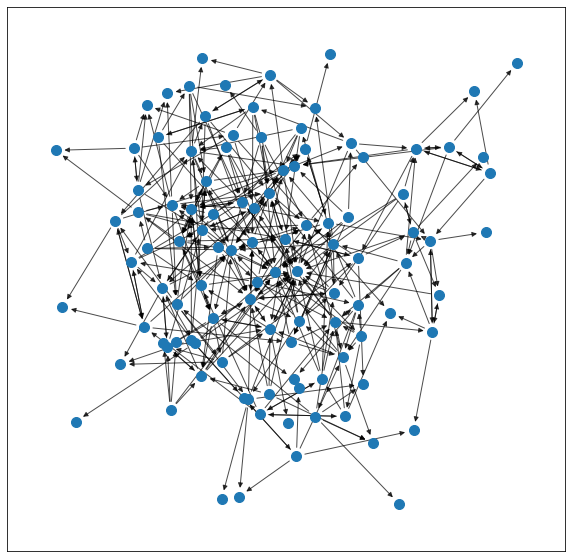

In [19]:
fig = plt.figure(figsize=(10, 10))
nx.set_node_attributes(graph, degree_centrality, "degree")
#I tested many layouts(planar, shell, bipartite, spectral, spring), and choosed the best one to our analysis
# kamada-kawai layout due to best drawing depend on centrality of graph and my big love to japanese culture :3
layout = nx.kamada_kawai_layout(graph)
nx.draw_networkx_edges(graph, layout, alpha=0.7)
nx.draw_networkx_nodes(graph, layout, node_size=100)

In [20]:
def plot_compare(graph, attribute, threshold = 0):
    att = nx.get_node_attributes(graph, attribute)
    nodes = graph.nodes()
    colors = [att[n] for n in nodes]
    layout = nx.kamada_kawai_layout(graph)
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle(attribute + " Centrality")
    node_col = nx.draw_networkx_nodes(graph, layout, nodelist=nodes, node_color=colors,node_size=100, cmap=plt.cm.rainbow)
    edge_col = nx.draw_networkx_edges(graph, layout, alpha=0.5)
    fig.colorbar(node_col)
    nodes_exceptional = [n for n in nodes if att[n] > threshold]
    for i in nodes_exceptional:
        print(rank_dict_idx[i])
        print(att[i])
    plt.savefig(attribute + "_centrality.png")

## Degree centrality

**Degree centrality** is historically first defined centrality metrics, which shows the number of incidence, calculated with following formula, where $j$ is vertex and $A_{ij}$ number of edges from node $j$ to node $i$:<br> <br>
$$C_D(j) = \sum_{j= 1}^{n}A_{ij}$$


Kanan Mikayilov
0.1826923076923077
Almaz Omarov
0.23076923076923078


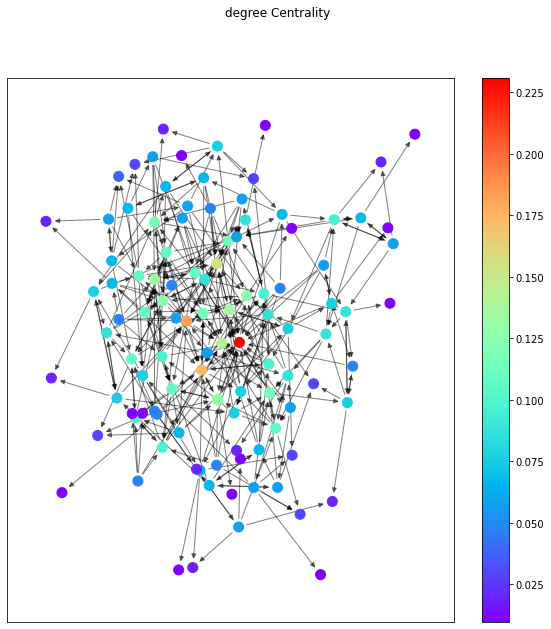

In [21]:
plot_compare(graph, "degree", 0.175)

## Betweenness Centrality

This metrics of centrality based on shortest path from one vertex to others. The highest value of metric shows that the vertex is included in shortest paths more than others. For each node it is calculated using following formula: <br> <br>
$$g(v)=\sum _{{s\neq v\neq t}}{\frac  {\sigma _{{st}}(v)}{\sigma _{{st}}}}$$
where ${\sigma _{st}}$ is the sum of the shortest paths number from node ${s}$ to node ${t}$ and ${\sigma _{st}(v)}$ is the number of those paths that pass through curent vertex ${v}$.

Almaz Omarov
0.10939199479228368


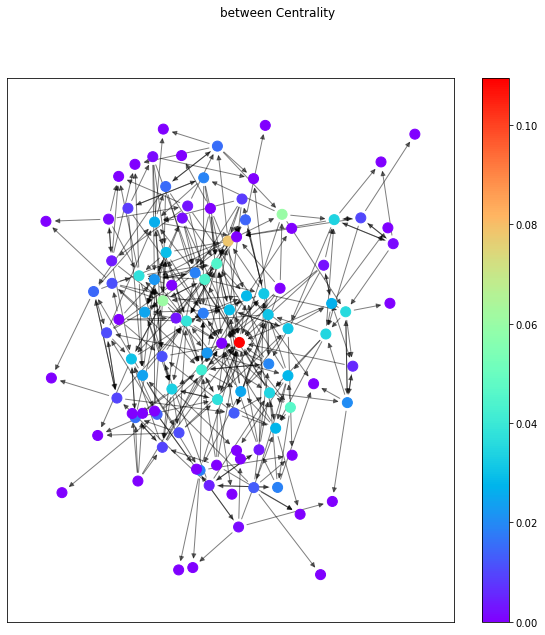

In [22]:
plot_compare(graph, "between", 0.08)

## Katz centrality

**Katz centrality** is a relative metric, which shows the influence of node within a network and calculated by measuring number of 1st degree neighbors and other neighbors, which are connected with 1st degree neighbor etc. The Katz Centrality calculated with following formula:
$${C_{\mathrm {Katz} }(i)=\sum _{k=1}^{\infty }\sum _{j=1}^{n}\alpha ^{k}(A^{k})_{ji}}$$

Kanan Mikayilov
0.2063898646372636
Narmin Ganbarli
0.2199139450035547
Almaz Omarov
0.2252776607548341
Anar Mammadov
0.18794950319103063


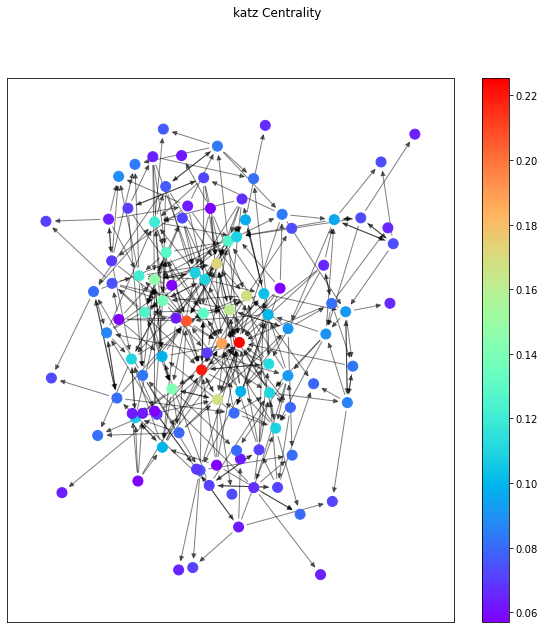

In [23]:
plot_compare(graph, "katz", 0.18)

## Closeness Centrality

**Closeness centrality** is centrality metric, calculated as the reciprocal of the sum of the length of the shortest paths between the node and other nodes in the graph. Calculated via formula:
$$C(x)={\frac  {1}{\sum _{y}d(y,x)}}$$
Where $d(y,x)$ shows **distance** between node $y$ and node $x$. 

Isa Baghirov
0.3043574922187639
Kanan Mikayilov
0.3230297310051911
Samir Aghayev
0.3043574922187639
Shoykyat Sharafyabi
0.30612701252236135
Narmin Ganbarli
0.3230297310051911
Almaz Omarov
0.3441427853192559
Anar Mammadov
0.309065934065934


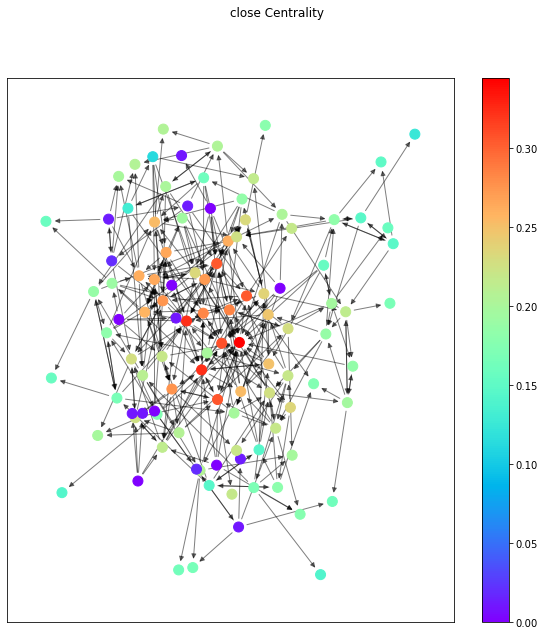

In [24]:
plot_compare(graph, "close", 0.3)

## Eigenvector centrality

This type of metric is very simillar to PageRank and Katz centrality and shows the influence of each node within a network. A high score means that it is connected to nodes within network, which also have high scores. Formula:
$${x_{v}={\frac {1}{\lambda }}\sum _{t\in M(v)}x_{t}={\frac {1}{\lambda }}\sum _{t\in G}a_{v,t}x_{t}}$$

Isa Baghirov
0.29198576239106694
Kanan Mikayilov
0.2745005265537588
Shoykyat Sharafyabi
0.3157159712272309
Kamal Taghiyev
0.2711415290065296
Narmin Ganbarli
0.4300589316199977


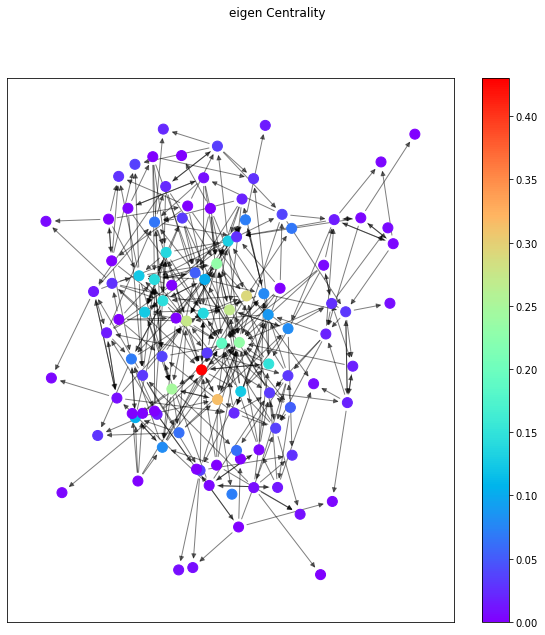

In [25]:
plot_compare(graph, "eigen", 0.25)

------

**Isa Bagirov 25.03.2021**